In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
pbmc.data <- Read10X(data.dir = ".")

In [3]:
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
pbmc

An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)

In [5]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

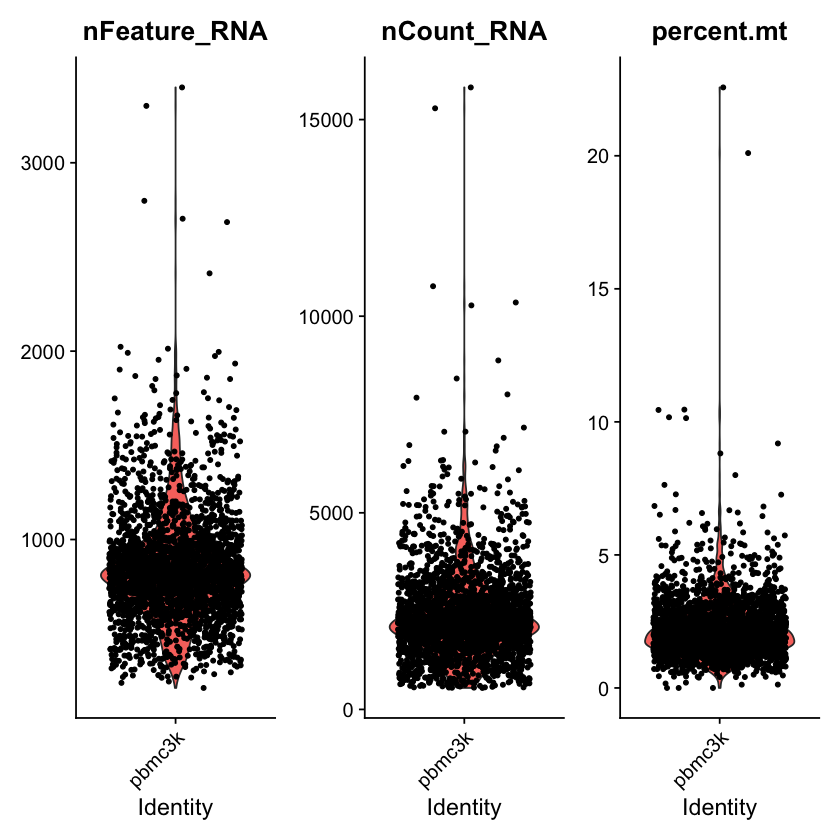

In [6]:
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

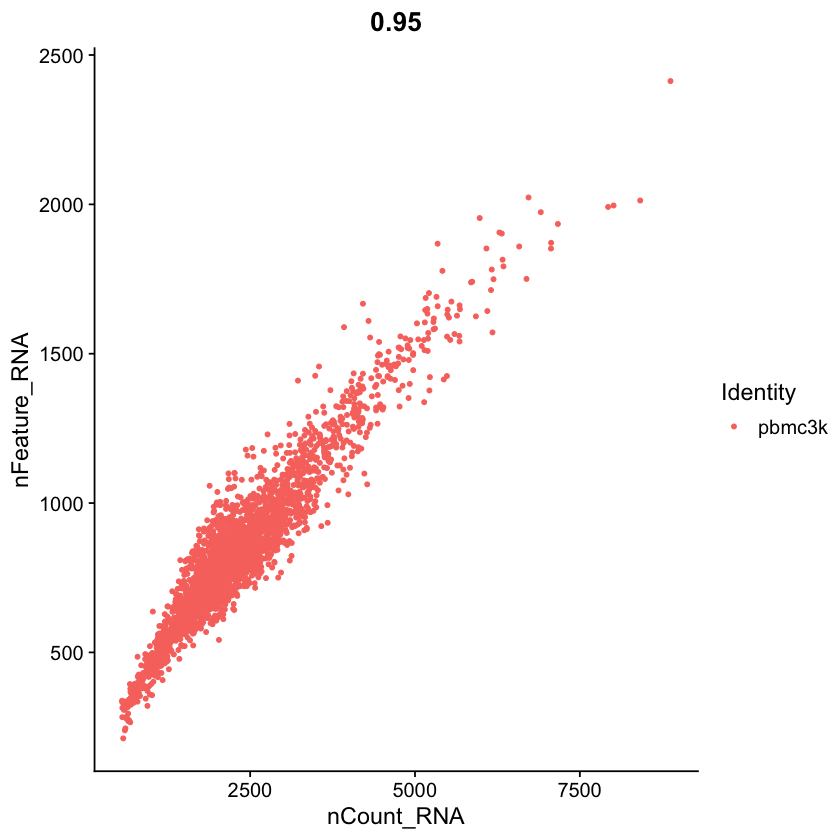

In [15]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot2

In [8]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

In [9]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [10]:
pbmc <- NormalizeData(pbmc)

In [11]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

In [12]:
top10

[1] "PPBP"   "LYZ"    "S100A9" "IGLL5"  "GNLY"   "FTL"    "PF4"    "FTH1"  
 [9] "GNG11"  "S100A8"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


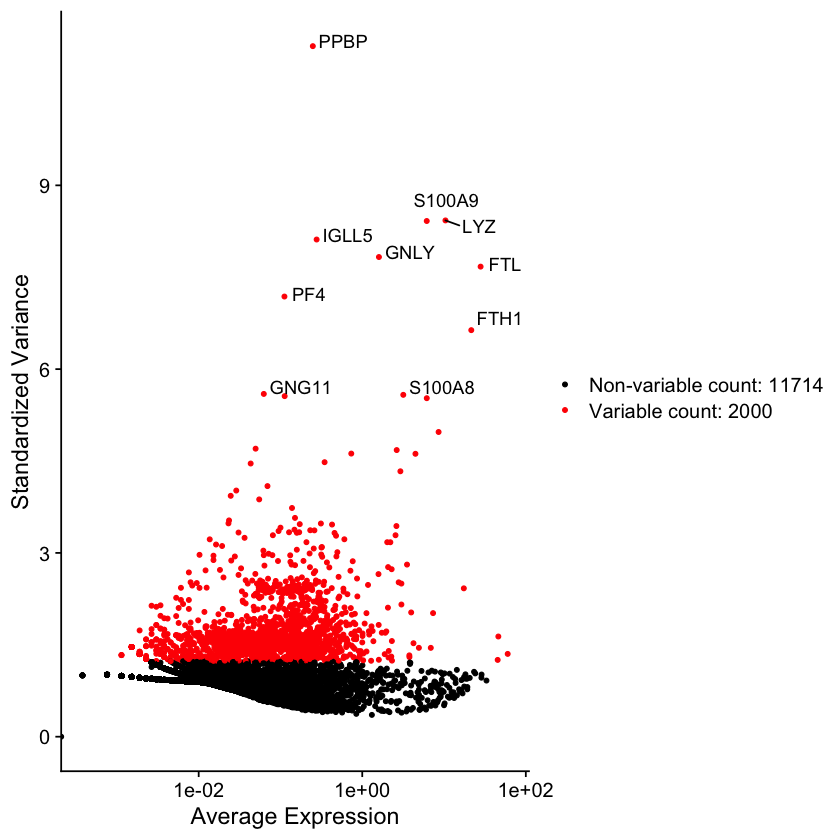

In [14]:
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [16]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [17]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

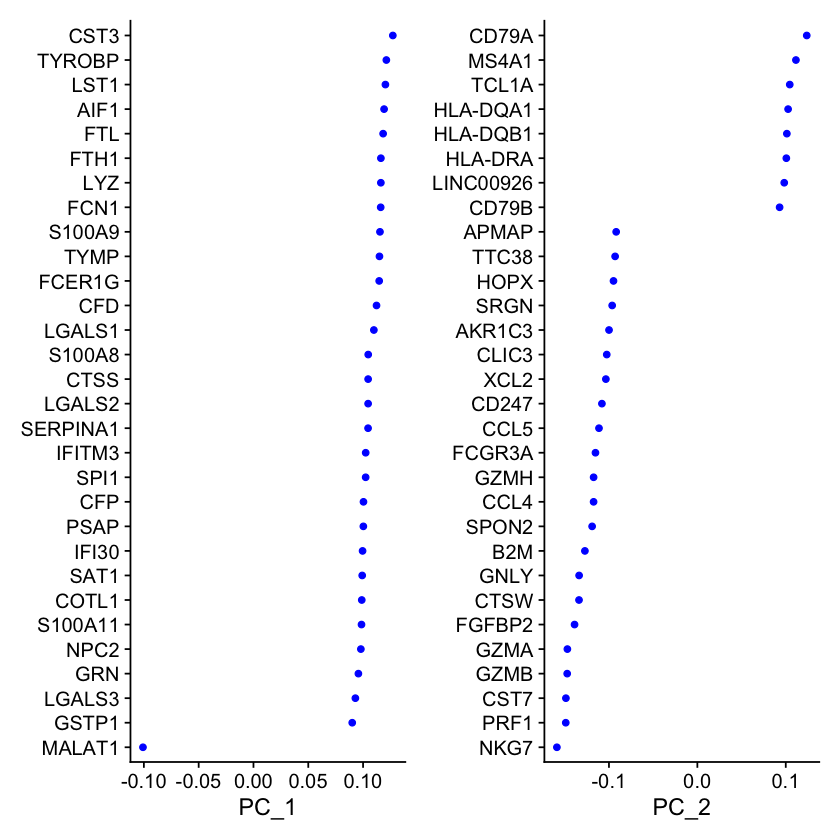

In [18]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

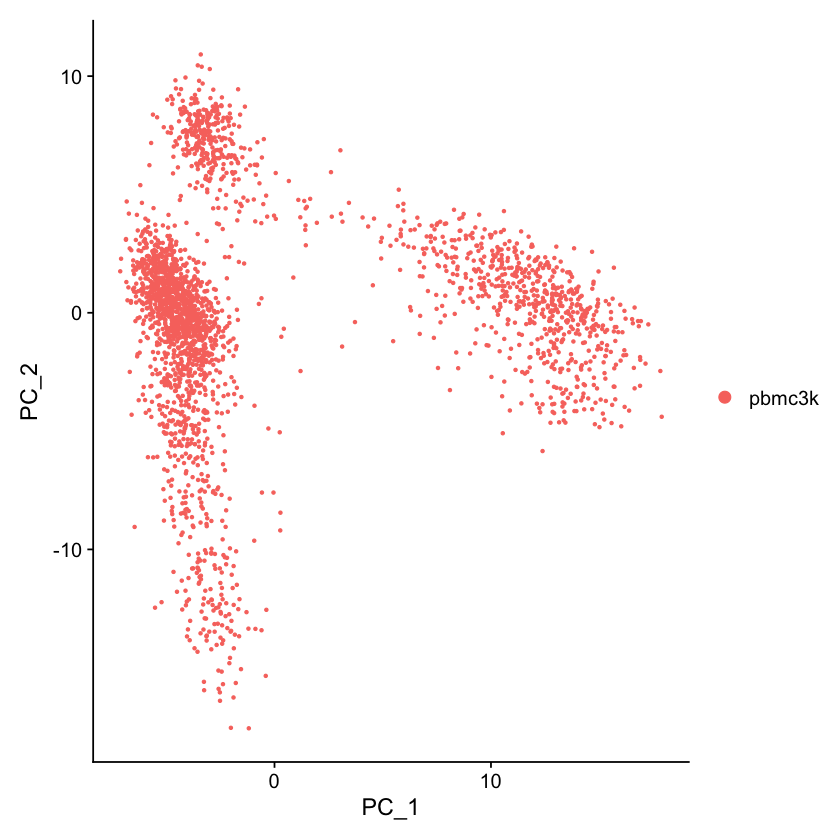

In [19]:
DimPlot(pbmc, reduction = "pca")

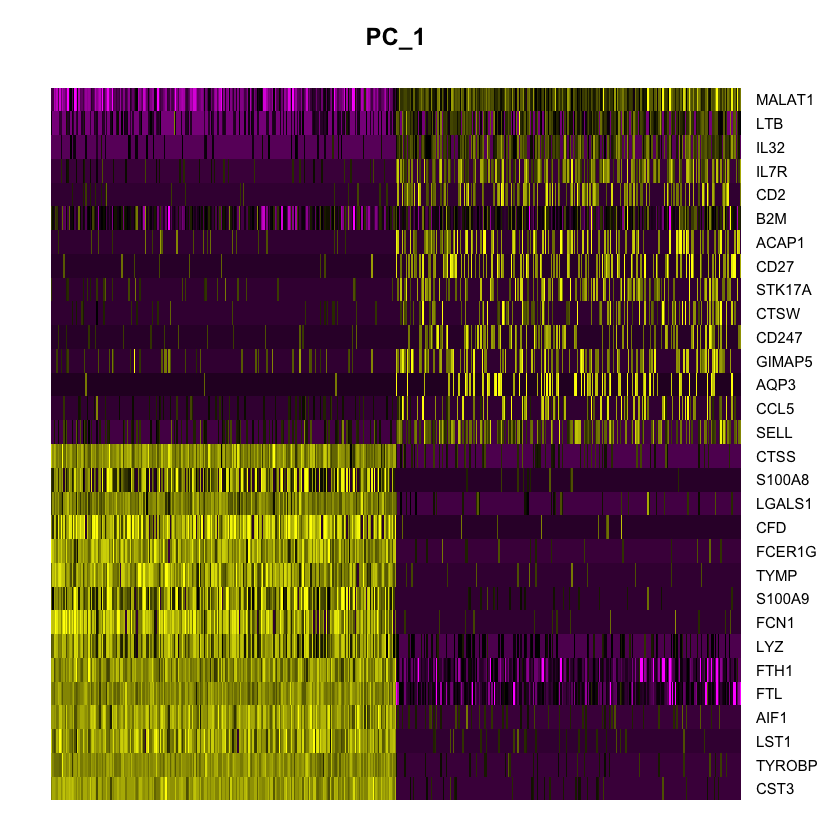

In [20]:
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

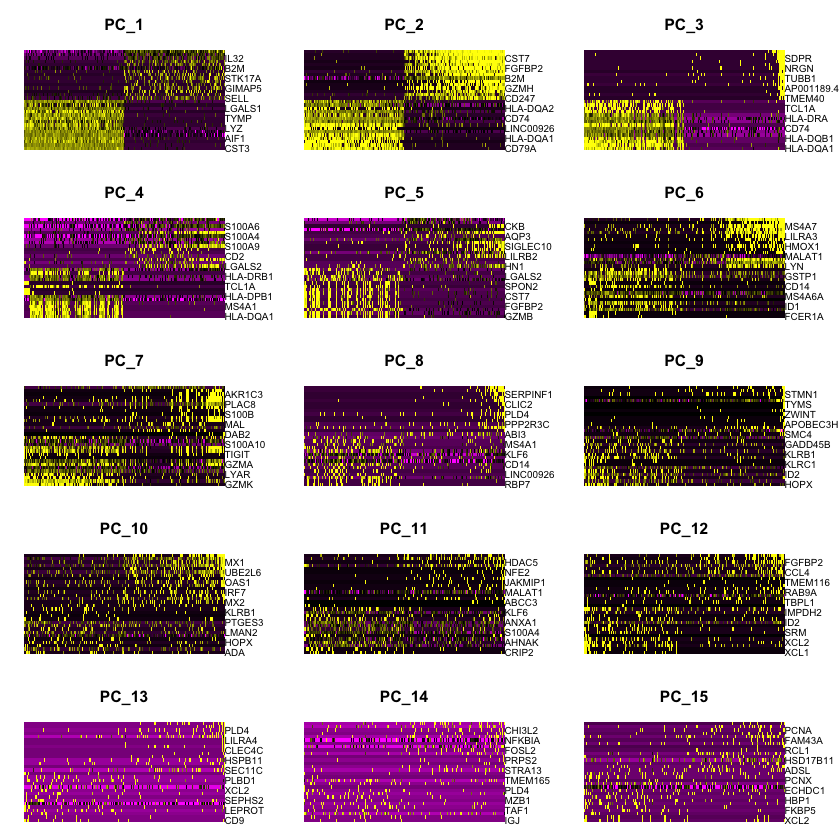

In [21]:
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

In [22]:
pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)

Warning message:
“Removed 23496 rows containing missing values (geom_point).”


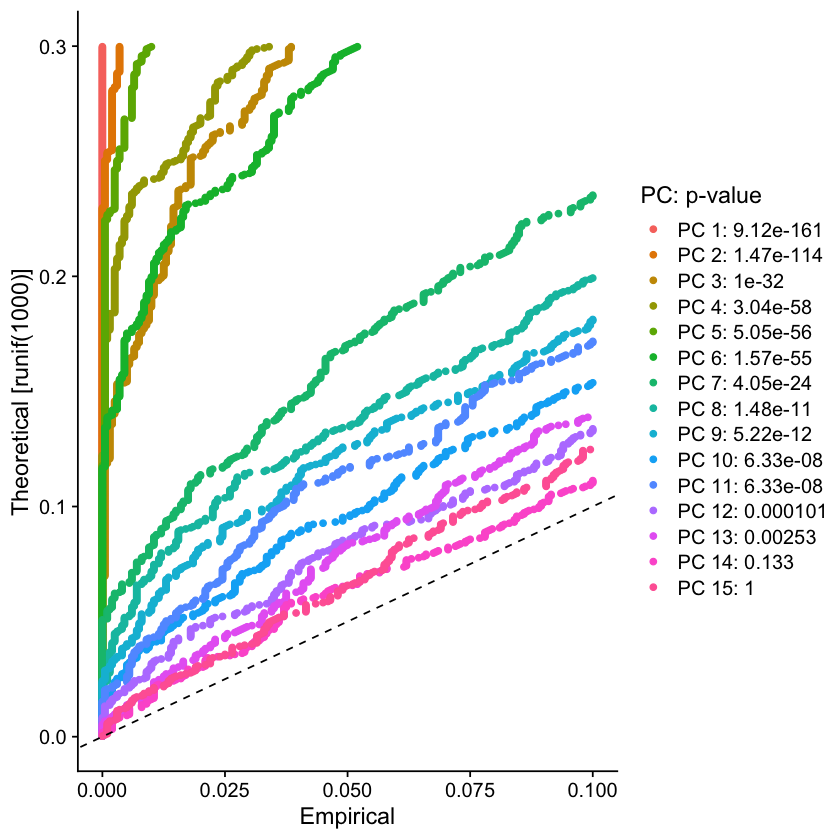

In [23]:
JackStrawPlot(pbmc, dims = 1:15)

In [25]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 96033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 9
Elapsed time: 0 seconds


In [26]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
01:25:10 UMAP embedding parameters a = 0.9922 b = 1.112

01:25:10 Read 2638 rows and found 10 numeric columns

01:25:10 Using Annoy for neighbor search, n_neighbors = 30

01:25:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

01:25:11 Writing NN index file to temp file /var/folders/ct/4sk3pgr10jl__1gsgn6t_j2m0000gn/T//RtmpUpJDXU/file10bf04e996c9e

01:25:11 Searching Annoy index using 1 thread, search_k = 3000

01:25:12 Annoy recall = 100%

01:25:12 Commencing smooth kNN distance calibr

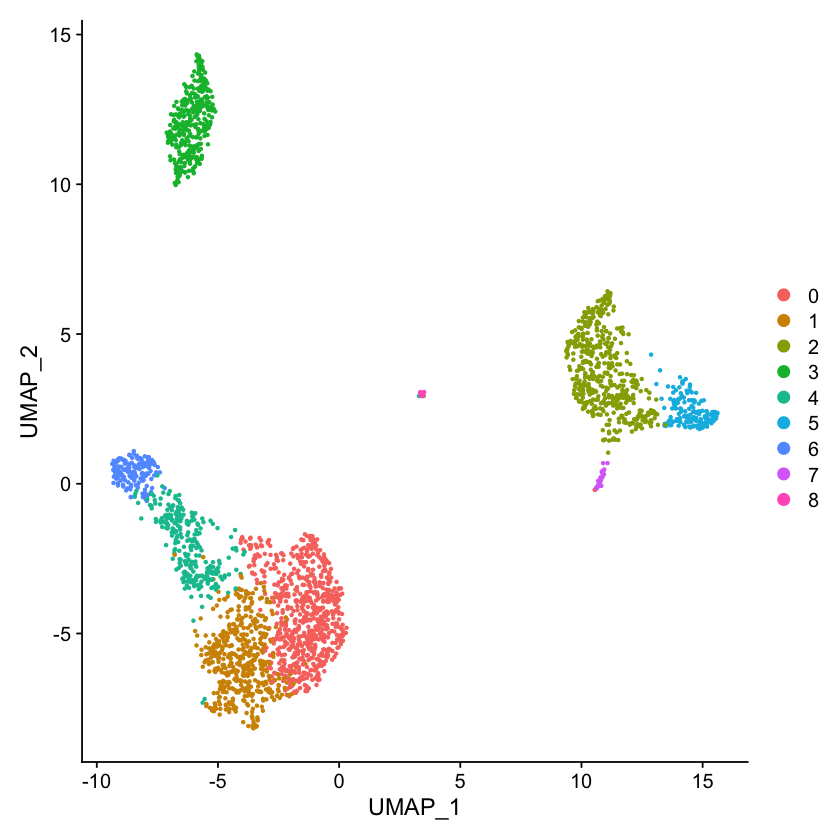

In [27]:
DimPlot(pbmc, reduction = "umap")

In [28]:
cluster1.markers <- FindMarkers(pbmc, ident.1 = 1, min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IL32,1.894810e-92,0.8373872,0.948,0.464,2.598542e-88
LTB,7.953303e-89,0.8921170,0.981,0.642,1.090716e-84
CD3D,1.655937e-70,0.6436286,0.919,0.431,2.270951e-66
IL7R,3.688893e-68,0.8147082,0.747,0.325,5.058947e-64
LDHB,2.292819e-67,0.6253110,0.950,0.613,3.144372e-63


In [30]:
# find all markers distinguishing cluster 3 from clusters 0 and 1
cluster5.markers <- FindMarkers(pbmc, ident.1 = 3, ident.2 = c(0, 1), min.pct = 0.25)
head(cluster5.markers, n = 5)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD79A,5.577857e-265,2.975517,0.936,0.046,7.649473e-261
HLA-DQA1,3.070291e-261,2.700531,0.890,0.024,4.210598e-257
HLA-DRB1,1.412230e-238,2.815624,0.983,0.134,1.936733e-234
MS4A1,1.351375e-227,2.356280,0.855,0.049,1.853276e-223
CD79B,2.266373e-225,2.601579,0.916,0.100,3.108104e-221


In [31]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.963031e-107,0.7300635,0.901,0.594,2.692101e-103,0,LDHB
1.606796e-82,0.9219135,0.436,0.110,2.203560e-78,0,CCR7
7.953303e-89,0.8921170,0.981,0.642,1.090716e-84,1,LTB
1.851623e-60,0.8586034,0.422,0.110,2.539316e-56,1,AQP3
0.000000e+00,3.8608733,0.996,0.215,0.000000e+00,2,S100A9
0.000000e+00,3.7966403,0.975,0.121,0.000000e+00,2,S100A8
0.000000e+00,2.9875833,0.936,0.041,0.000000e+00,3,CD79A
9.481783e-271,2.4894932,0.622,0.022,1.300332e-266,3,TCL1A
2.958181e-189,2.1220555,0.985,0.240,4.056849e-185,4,CCL5


In [32]:
cluster1.markers <- FindMarkers(pbmc, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

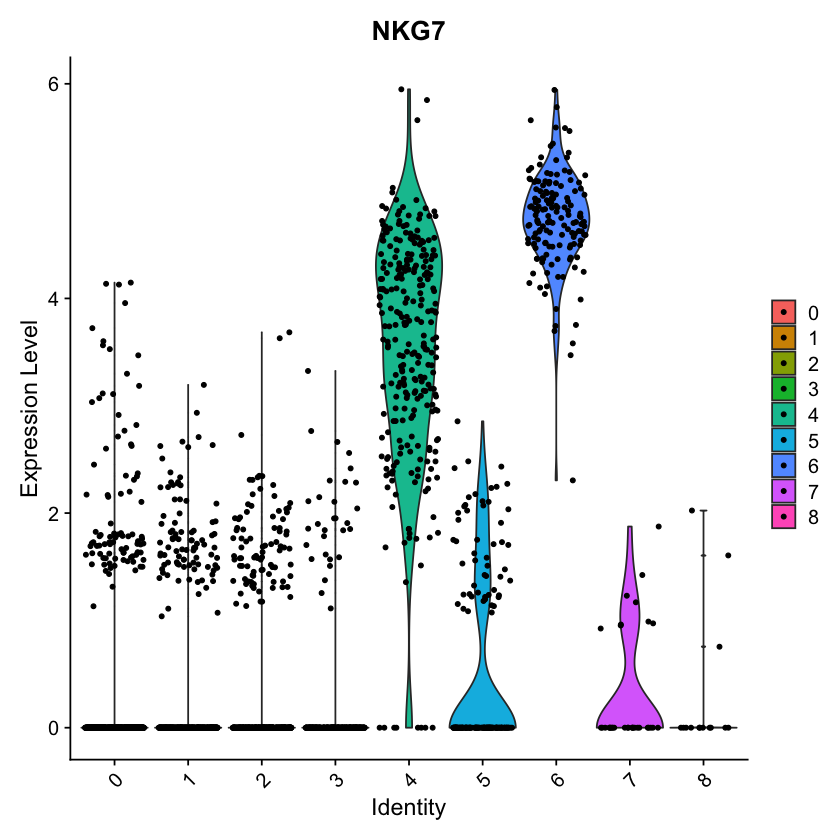

In [38]:
VlnPlot(pbmc, features = "NKG7")

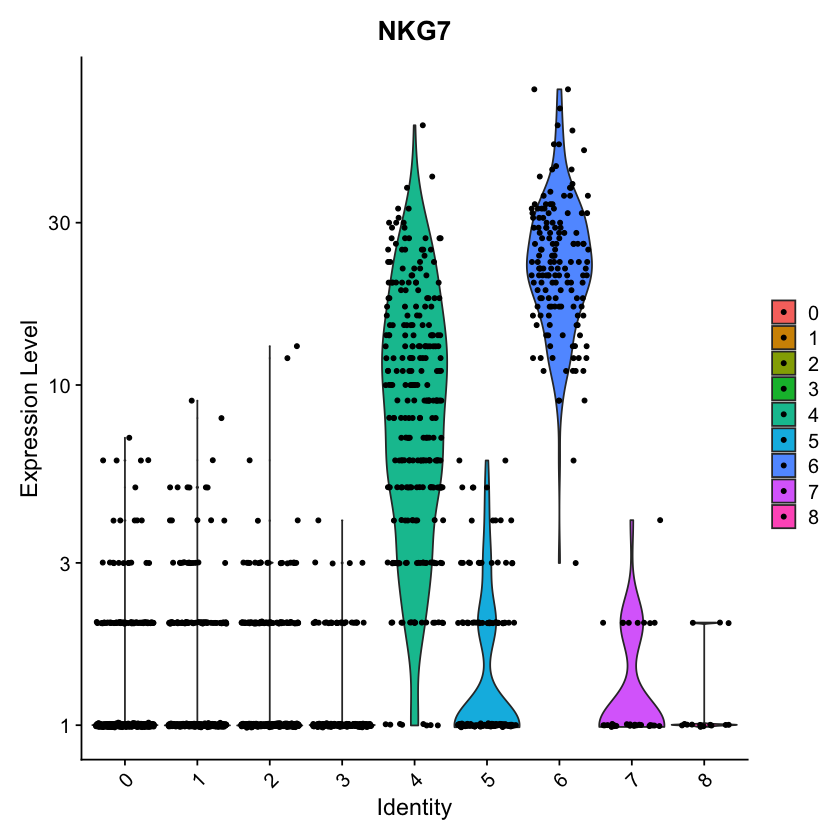

In [37]:
# you can plot raw counts as well
VlnPlot(pbmc, features = c("NKG7"), slot = "counts", log = TRUE)

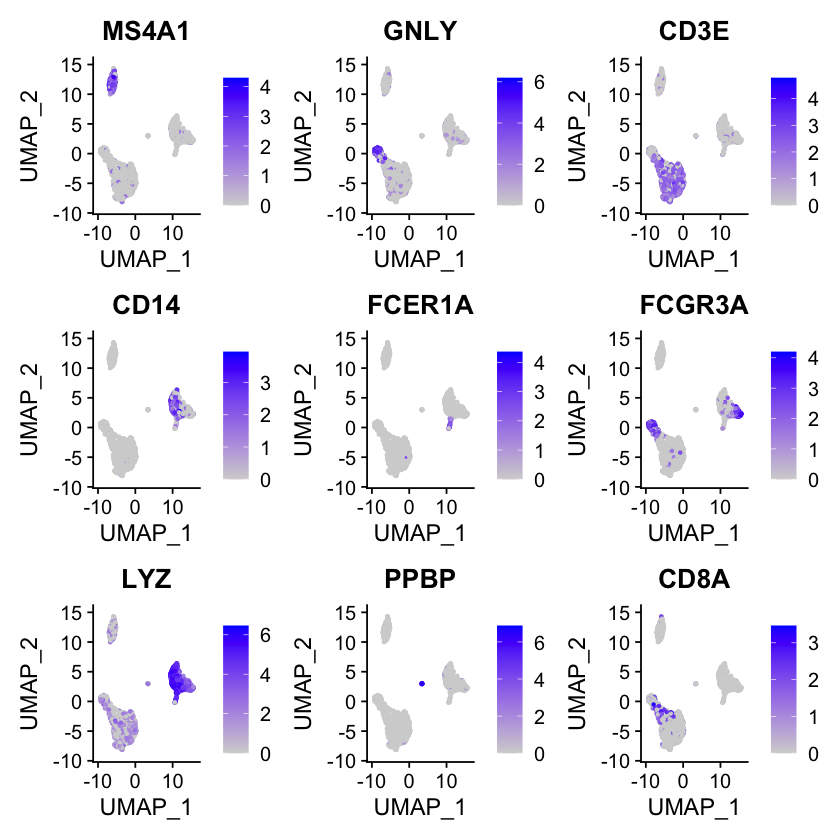

In [39]:
FeaturePlot(pbmc, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP", 
    "CD8A"))

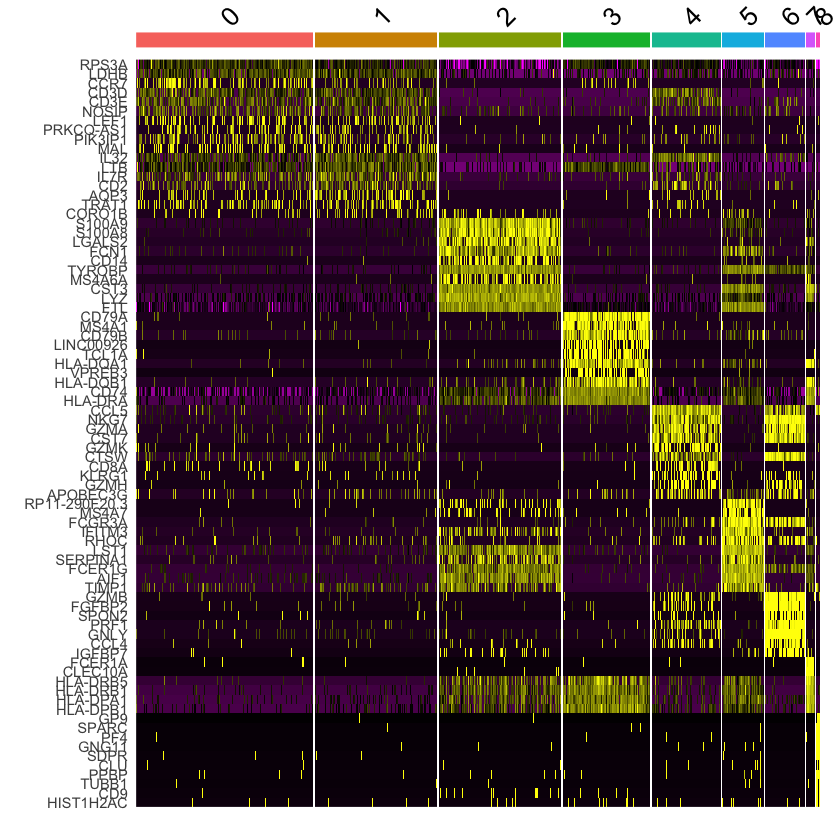

In [40]:
top10 <- pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
DoHeatmap(pbmc, features = top10$gene) + NoLegend()

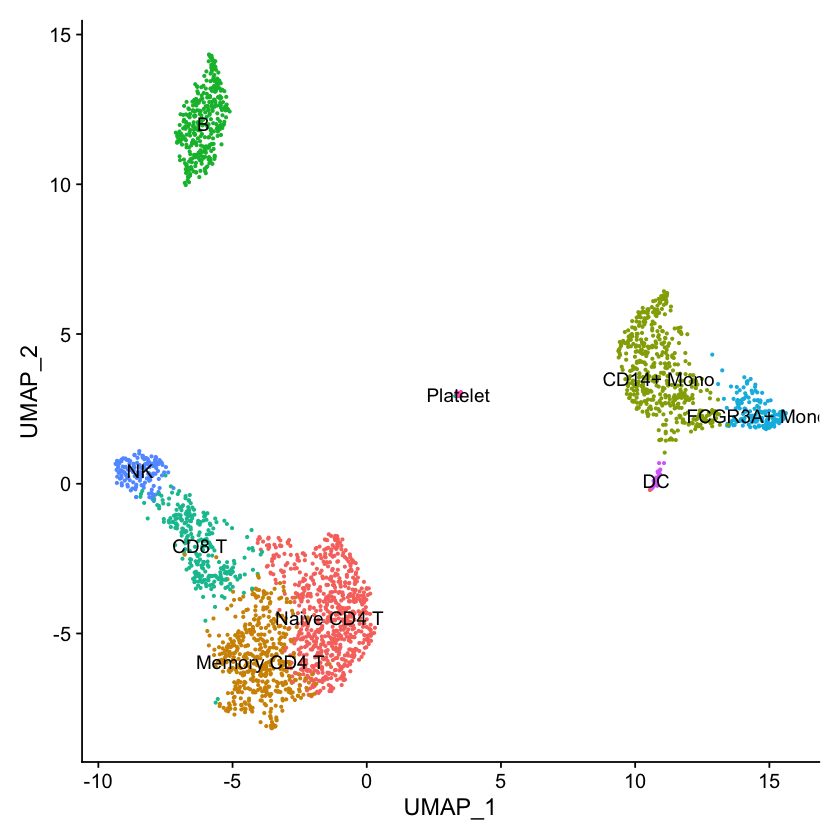

In [41]:
#Assigning cell type identity to clusters
new.cluster.ids <- c("Naive CD4 T", "Memory CD4 T", "CD14+ Mono", "B", "CD8 T", "FCGR3A+ Mono", 
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()